In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from IPython.display import Image  
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz

from IPython.display import Image
import pydotplus

C:\Users\Kousalya Ganesan\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from time import time


from sklearn.preprocessing import StandardScaler
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
import lightgbm as lgb

from IPython.display import Image  
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz

from IPython.display import Image
import pydotplus

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
data = pd.read_csv("C:\\Users\\Kousalya Ganesan\\Downloads\\Microsoft.SkypeApp_kzf8qxf38zg5c!App\All\\diabetic_data.csv")
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [6]:
data['race'].unique()

array(['Caucasian', 'AfricanAmerican', '?', 'Other', 'Asian', 'Hispanic'],
      dtype=object)

In [7]:
data['age'] = data['age'].str[1:].str.split('-',expand=True)
data['gender'] = data['gender'].replace('Unknown/Invalid',np.nan)

In [8]:
## dropping the columns with null values greater than 50%
df = data.drop(['weight','payer_code','medical_specialty','encounter_id','patient_nbr'],axis=1)

In [9]:
df.replace('?',np.nan,inplace=True)

### Label Encoding the Categorical variables

In [10]:
df['gender'] = df['gender'].map({'Female':0,'Male':1})

## since among the races,'Hispanic','Asian','Others' categories are having very less count,we are GROUPING them together

df['race'] = df['race'].map({'Caucasian':1,'AfricanAmerican':2,'Hispanic':3,'Other':5,'Asian':4})

df['max_glu_serum'] = df['max_glu_serum'].map({'None':0,'>300':3,'>200':2,'Norm':1})

df['A1Cresult'] = df['A1Cresult'].map({'None':0,'>7':2,'>8':3,'Norm':1})

df = df.drop(['examide','citoglipton'],axis=1) ## we are droping this columns since they have only unique values

df['change'] = df['change'].map({'Ch':1,'No':0})

df['diabetesMed'] = df['diabetesMed'].map({'No':0,'Yes':1})

df['readmitted'] = df['readmitted'].map({'NO':0,'<30':1,'>30':1})

In [11]:
df[['diag_1','diag_2','diag_3']] = df[['diag_1','diag_2','diag_3']].replace(to_replace ='^V',value = 1001,regex=True)
df[['diag_1','diag_2','diag_3']] = df[['diag_1','diag_2','diag_3']].replace(to_replace ='^E',value = 1010,regex=True)

In [12]:
df[['diag_1','diag_2','diag_3']] = df[['diag_1','diag_2','diag_3']].astype(float)

In [13]:
df = df[df['diag_1'].notna()]
df = df[df['diag_2'].notna()]
df['diag_3'].fillna(25, inplace=True)

In [14]:
df['race'].fillna(df['race'].mode()[0], inplace=True)

In [15]:
df['gender'].fillna(df['gender'].mode()[0], inplace=True)

In [16]:
df.isnull().sum()

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide

In [17]:
## encoding 24 drugs

drugs=["metformin", "repaglinide", "nateglinide", "chlorpropamide", "glimepiride", "acetohexamide", "glipizide", "glyburide", "tolbutamide", "pioglitazone", 
"rosiglitazone", "acarbose", "miglitol", "troglitazone", "tolazamide", "insulin", "glyburide-metformin", "glipizide-metformin", 
"glimepiride-pioglitazone", "metformin-rosiglitazone", "metformin-pioglitazone"]

for i in drugs:
    df.loc[df[i] == 'No', [i]] = 0 
    df.loc[df[i] == 'Up', [i]] = 3  
    df.loc[df[i] == 'Down', [i]] = 1 
    df.loc[df[i] == 'Steady', [i]] = 2 

In [18]:
def diag(data):
    if (data >= 1)&(data < 140):
        return 1
    elif (data >= 140)&(data < 240):
        return 2
    elif (data >= 240)&(data < 280):
        return 3
    elif (data >= 280)&(data < 290):
        return 4
    elif (data >= 290)&(data < 320):
        return 5
    elif (data >= 320)&(data < 390):
        return 6
    elif (data >= 390)&(data < 460):
        return 7
    elif (data >= 460)&(data < 520):
        return 8
    elif (data >= 520)&(data < 580):
        return 9
    elif (data >= 580)&(data < 630):
        return 10
    elif (data >= 630)&(data < 680):
        return 11
    elif (data >= 680)&(data < 710):
        return 12
    elif (data >= 710)&(data < 740):
        return 13
    elif (data >= 740)&(data < 760):
        return 14
    elif (data >= 760)&(data < 780):
        return 15
    elif (data >= 780)&(data < 800):
        return 16
    elif (data >= 800)&(data < 1000):
        return 17
    elif (data == 1001):
        return 18
    elif (data == 1010):
        return 19
    else: np.nan

In [19]:
def admission_type(data):
    if (data == 1) |(data == 2):
        return 1
    elif (data == 3):
        return 2
    elif (data == 4):
        return 3
    elif (data == 5):
        return 4
    else : return 5

In [20]:
def discharge_id(data):
    if (data == 1):
        return 1
    elif (data >1)&(data<7)&(data!=4):
        return 2
    elif (data == 4):
        return 3
    elif data == 7:
        return 4
    elif data == 9:
        return 6
    elif data == 20:
        return 7
    else : return 5

In [21]:
def admission_source(data):
    if (data>=1) & (data<=3):
        return 1
    elif (data>=4)& (data<=6):
        return 2
    elif (data==7):
        return 3
    elif (data==8):
        return 4
    elif (data==9):
        return 5
    else : return 6

In [22]:
df['diag_1'] = df['diag_1'].apply(diag)
df['diag_2'] = df['diag_2'].apply(diag)
df['diag_3'] = df['diag_3'].apply(diag)
df['admission_type_id'] = df['admission_type_id'].apply(admission_type)
df['discharge_disposition_id'] = df['discharge_disposition_id'].apply(discharge_id)
df['admission_source_id'] = df['admission_source_id'].apply(admission_source)

In [23]:
df['age']=df['age'].astype(int)
df['gender']=df['gender'].astype(int)
df['race']=df['race'].astype(int)

In [24]:
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,1,0,10,1,1,3,3,59,0,18,0,0,0,3,3,3,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,1,1
2,2,0,20,1,1,3,2,11,5,13,2,0,1,11,3,18,6,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,1,30,1,1,3,2,44,1,16,0,0,0,1,3,7,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,1,0
4,1,1,40,1,1,3,1,51,0,8,0,0,0,2,2,3,5,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,1,0
5,1,1,50,1,1,1,3,31,6,16,0,0,0,7,7,3,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,1


### Treating the Outliers

C:\Users\Kousalya Ganesan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\Kousalya Ganesan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\Kousalya Ganesan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this war

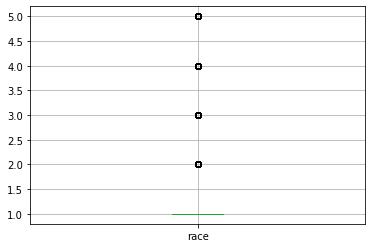

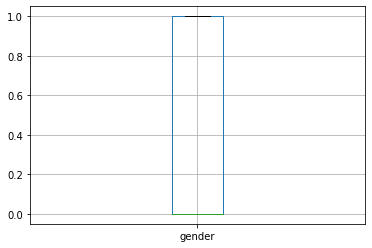

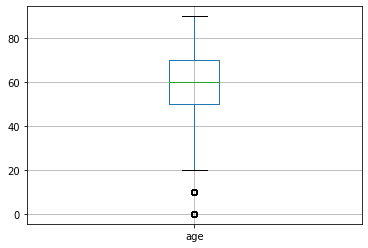

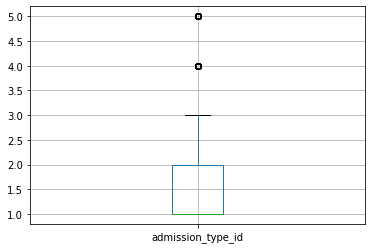

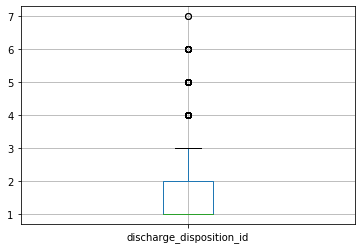

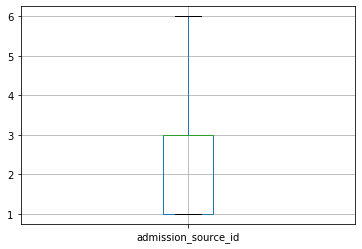

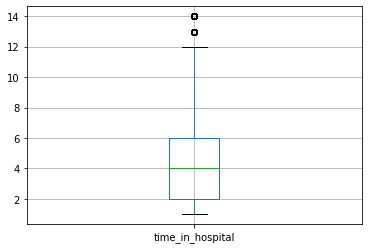

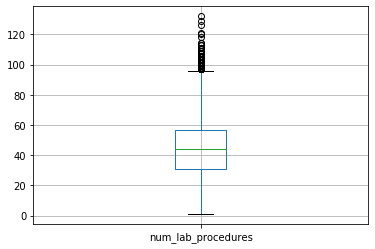

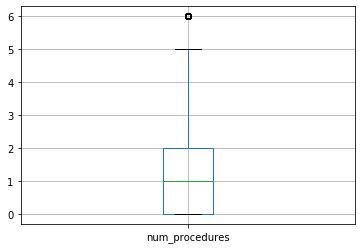

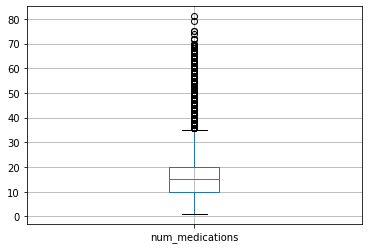

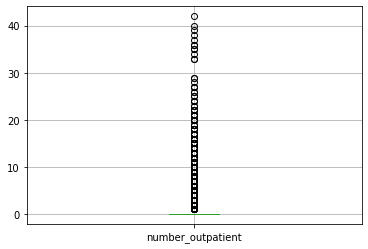

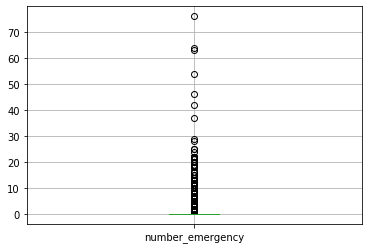

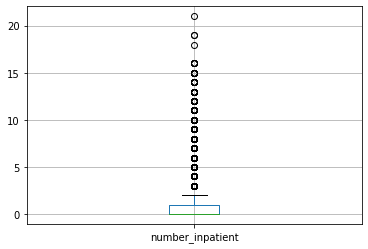

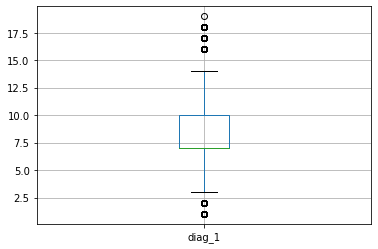

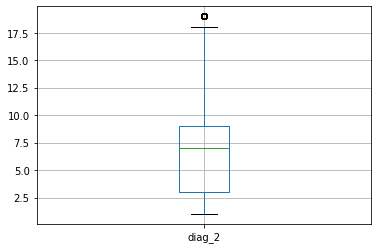

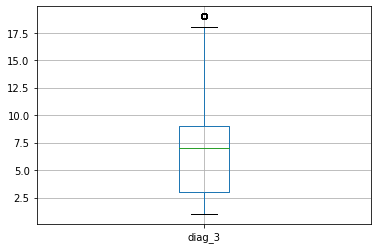

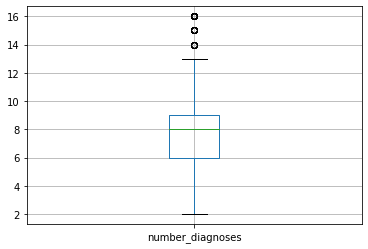

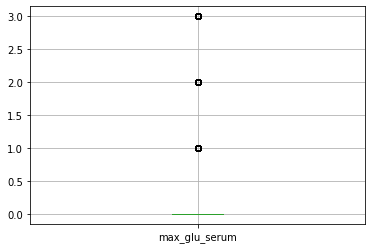

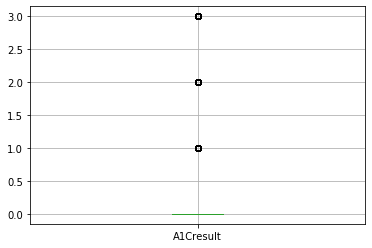

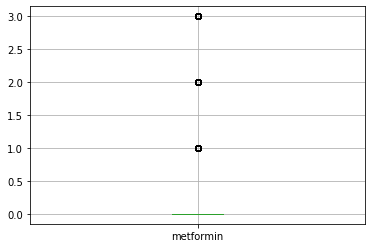

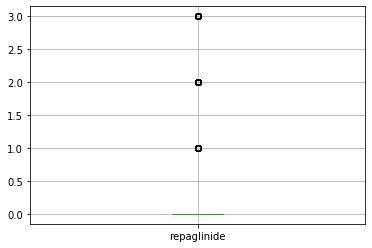

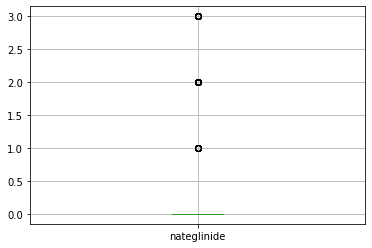

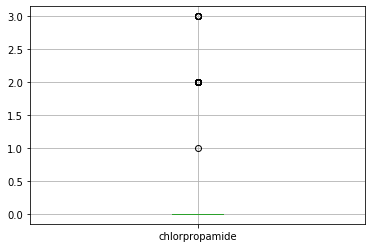

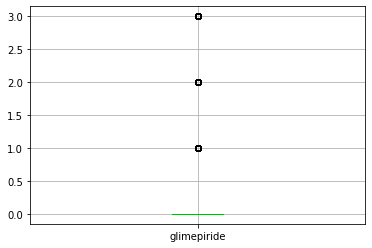

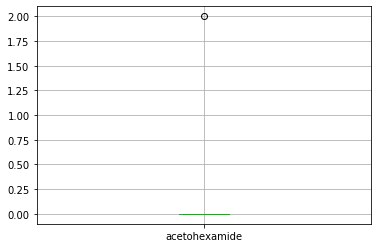

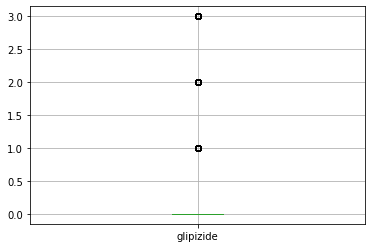

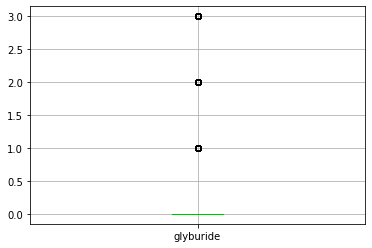

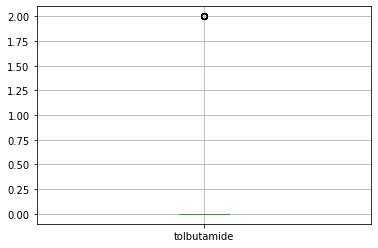

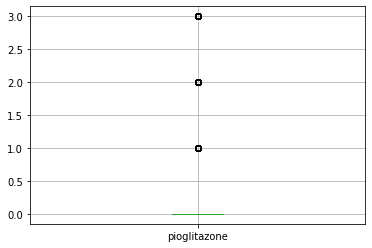

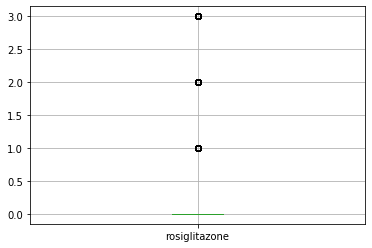

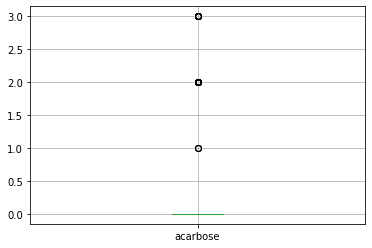

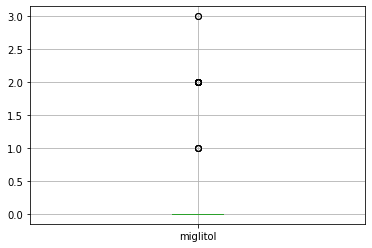

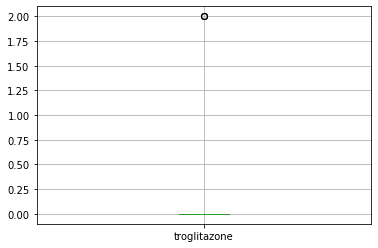

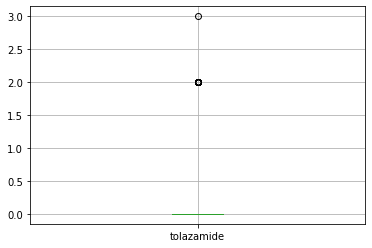

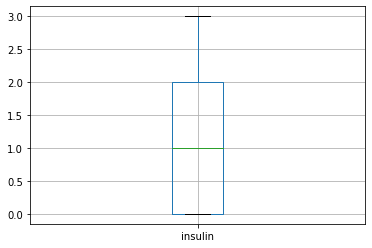

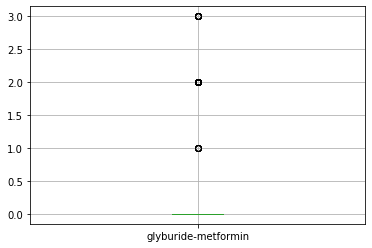

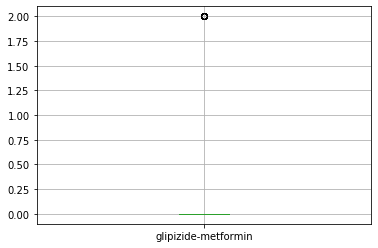

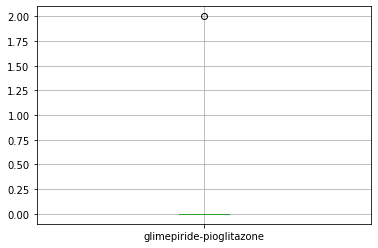

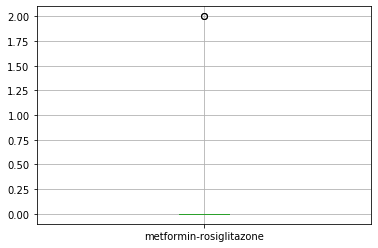

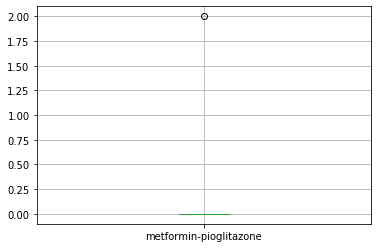

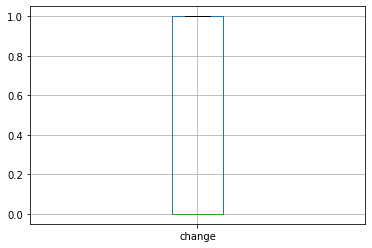

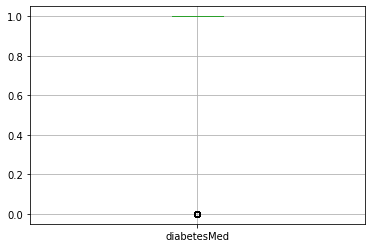

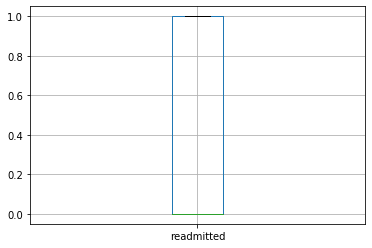

In [25]:
for column in df:
    plt.figure()
    df.boxplot([column])

In [26]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
##print(IQR)

In [27]:
(((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum())

race                        23307
gender                          0
age                           716
admission_type_id           10398
discharge_disposition_id    10521
admission_source_id             0
time_in_hospital             2250
num_lab_procedures            143
num_procedures               4949
num_medications              2557
number_outpatient           16714
number_emergency            11364
number_inpatient             7032
diag_1                      22373
diag_2                        731
diag_3                       1243
number_diagnoses               62
max_glu_serum                5342
A1Cresult                   16873
metformin                   19930
repaglinide                  1538
nateglinide                   702
chlorpropamide                 86
glimepiride                  5176
acetohexamide                   1
glipizide                   12665
glyburide                   10629
tolbutamide                    23
pioglitazone                 7309
rosiglitazone 

### Data Visualization

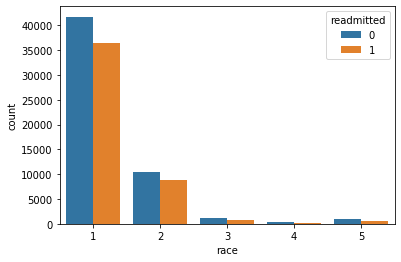

In [28]:
## Race
sns.countplot (df['race'], hue=df['readmitted'])

####  Class 1 (Caucasian race) has the highest count of readmission

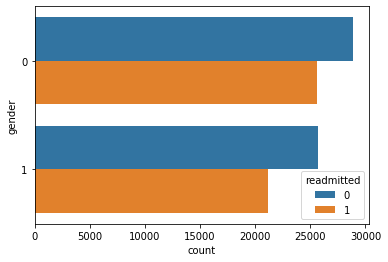

In [29]:
## Gender
sns.countplot(y = df['gender'], hue = df['readmitted'])

#### Class 0 - count of readmission of females is slightly higher compared to that of males.

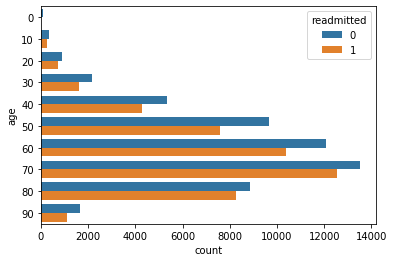

In [30]:
## Age
sns.countplot(y= df['age'], hue = df['readmitted'])

#### People who are under category 70 - 80 years of age  are getting readmitted more compared to other categories.

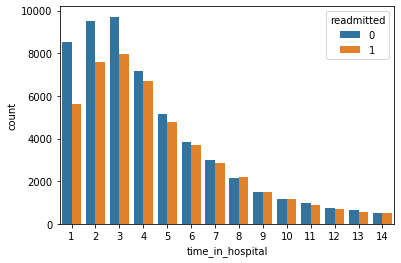

In [31]:
## time_in_hospital Vs Readmission
sns.countplot(df['time_in_hospital'],hue = df['readmitted'])

#### Lesser the number of days in the hospital,there is more chance of getting readmitted

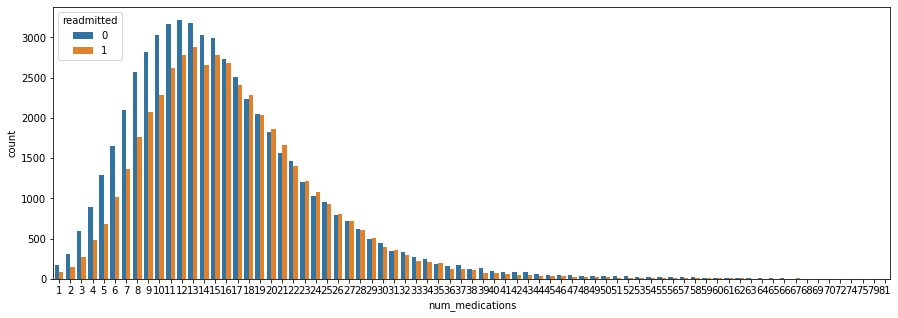

In [32]:
## num_medications Vs Readmission
plt.figure(figsize=(15,5))
sns.countplot(df['num_medications'],hue = df['readmitted'])

##### when less number of medications given more patients got readmitted

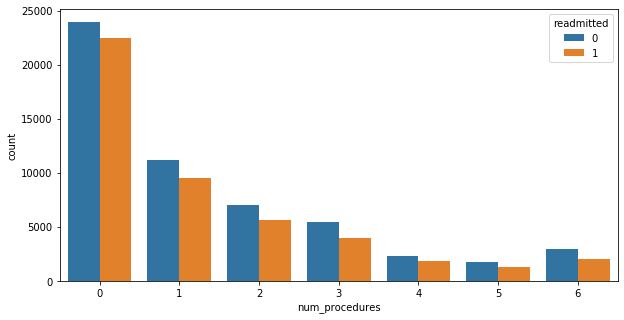

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(df['num_procedures'],hue = df['readmitted'])

#### Lesser the number of procedures undergone,more chances of readmission(no of procedures =0 has the highest count).

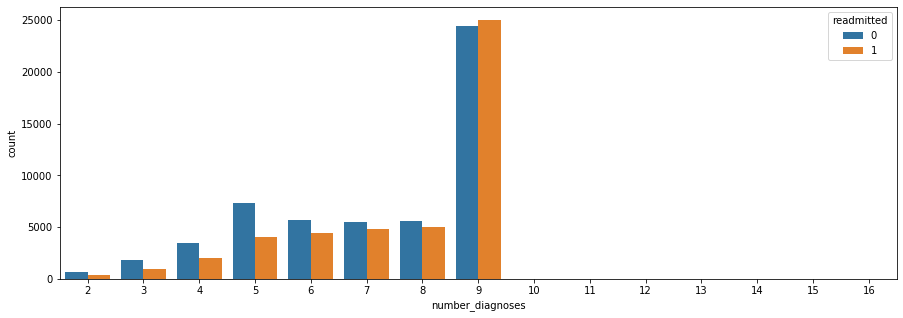

In [34]:
plt.figure(figsize=(15,5))
sns.countplot(df['number_diagnoses'],hue = df['readmitted'])

#### Higher the no of diagnoses tested, more the chances of readmission(no of diagnoses =9 has the highest count).

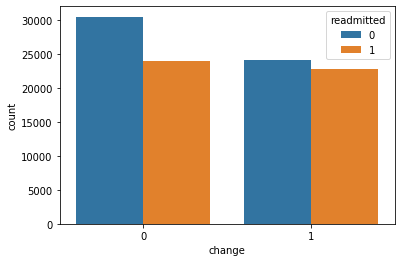

In [35]:
##  change of medications Vs Readmission
sns.countplot(df['change'], hue = df['readmitted'])

#### changing the medicines does not affect the readmission much

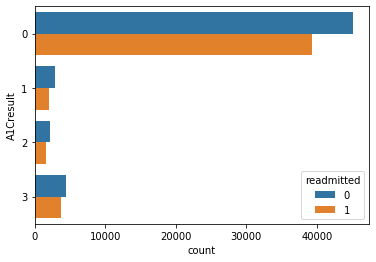

In [36]:
# A1Cresult Vs readmitted
sns.countplot(y= df['A1Cresult'], hue = df['readmitted'])

#### When A1Cresult test is not taken there are more chances of getting readmitted.

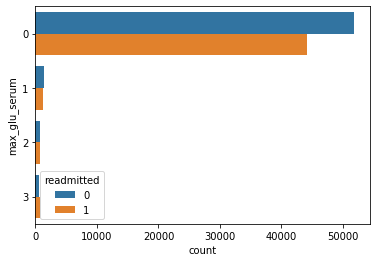

In [37]:
## max_glu_serum Vs readmitted
sns.countplot(y = df['max_glu_serum'], hue = df['readmitted'])

#### When Glucose test is not taken there are more chances of getting readmitted.

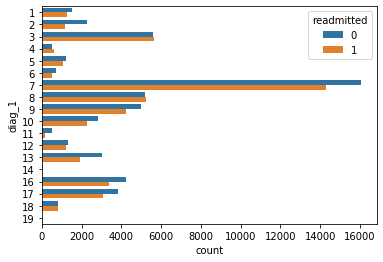

In [38]:
sns.countplot(y = df['diag_1'], hue = df['readmitted'])

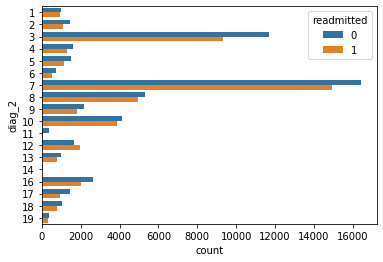

In [39]:
sns.countplot(y = df['diag_2'], hue = df['readmitted'])

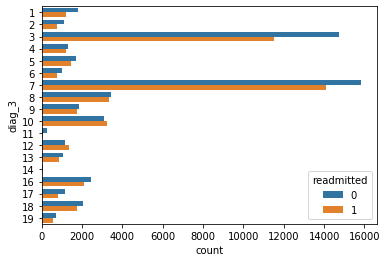

In [40]:
sns.countplot(y = df['diag_3'], hue = df['readmitted'])

#### Patients with Diseases in the Circulatory get readmitted more 
#### followed by patients with Endocrine problems 

In [41]:
cat_col = df[['race','age','admission_type_id', 'discharge_disposition_id', 
              'admission_source_id','diag_1', 'diag_2', 'diag_3']]    ## 8 columns

odinal_col = df[['gender','max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
                'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide','glyburide', 'tolbutamide', 'pioglitazone',
                'rosiglitazone', 'acarbose','miglitol', 'troglitazone', 'tolazamide', 'insulin','glyburide-metformin',
                'glipizide-metformin','glimepiride-pioglitazone', 'metformin-rosiglitazone','metformin-pioglitazone',
                'change', 'diabetesMed','readmitted']]   ## 26 columns, 1 target col

num_col = df[['time_in_hospital', 'num_lab_procedures', 'num_procedures','number_inpatient','num_medications',
              'number_outpatient','number_emergency','number_diagnoses']]   ## 8 columns

In [42]:
drugs = df[['metformin', 'repaglinide', 'nateglinide','chlorpropamide', 'glimepiride', 'acetohexamide',
            'glipizide','glyburide', 'tolbutamide', 'pioglitazone','rosiglitazone', 'acarbose','miglitol',
            'troglitazone', 'tolazamide', 'insulin','glyburide-metformin','glipizide-metformin',
            'glimepiride-pioglitazone', 'metformin-rosiglitazone','metformin-pioglitazone','readmitted']]

drugs_col = ['metformin', 'repaglinide', 'nateglinide','chlorpropamide', 'glimepiride', 'acetohexamide',
            'glipizide','glyburide', 'tolbutamide', 'pioglitazone','rosiglitazone', 'acarbose','miglitol',
            'troglitazone', 'tolazamide', 'insulin','glyburide-metformin','glipizide-metformin',
            'glimepiride-pioglitazone', 'metformin-rosiglitazone','metformin-pioglitazone']


In [43]:
drugs[drugs['readmitted']==1].sum(axis=0).sort_values(ascending=False)

insulin                     51626
readmitted                  46790
metformin                   17443
glipizide                   12437
glyburide                    9775
pioglitazone                 7105
rosiglitazone                6180
glimepiride                  4905
repaglinide                  1721
nateglinide                   688
glyburide-metformin           670
acarbose                      370
chlorpropamide                 83
miglitol                       43
tolazamide                     27
glipizide-metformin            16
tolbutamide                    16
troglitazone                    4
acetohexamide                   2
glimepiride-pioglitazone        2
metformin-pioglitazone          0
metformin-rosiglitazone         0
dtype: int64

In [44]:
drugs[drugs['readmitted']==0].sum(axis=0).sort_values(ascending=False)

insulin                     55715
metformin                   22908
glipizide                   13102
glyburide                   11731
pioglitazone                 7628
rosiglitazone                6615
glimepiride                  5579
repaglinide                  1419
glyburide-metformin           738
nateglinide                   729
acarbose                      251
chlorpropamide                 94
tolazamide                     52
tolbutamide                    30
miglitol                       29
glipizide-metformin            10
metformin-rosiglitazone         4
troglitazone                    2
metformin-pioglitazone          2
glimepiride-pioglitazone        0
acetohexamide                   0
readmitted                      0
dtype: int64

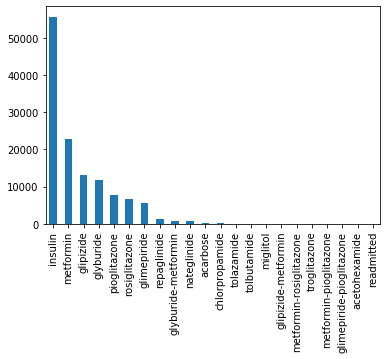

In [45]:
drugs[drugs['readmitted']==0].sum(axis=0).sort_values(ascending=False).plot(kind='bar')

In [46]:
table1 = pd.crosstab(drugs['insulin'],drugs['readmitted'])
table1

readmitted,0,1
insulin,,
0,26600,20671
1,5739,6426
2,16801,13879
3,5458,5814


In [47]:
from sklearn.feature_selection import chi2

In [48]:
chi=chi2(df[['race','gender','age','admission_type_id','discharge_disposition_id',
    'admission_source_id','diag_1','diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed']],df["readmitted"])

In [49]:
feature = pd.DataFrame(chi,index=["chi_2","p_value"],columns=['race','gender','age','admission_type_id','discharge_disposition_id',
    'admission_source_id','diag_1','diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed']).T

In [50]:
feature['p_value'].sort_values(ascending=True)

age                         1.120656e-71
insulin                     1.900939e-37
discharge_disposition_id    3.826738e-33
metformin                   5.493372e-32
admission_source_id         9.848716e-32
change                      1.142344e-26
diag_3                      1.165817e-23
repaglinide                 2.165728e-22
diabetesMed                 3.982066e-21
max_glu_serum               1.372241e-16
glipizide                   3.080381e-16
diag_1                      2.045612e-14
acarbose                    1.889039e-11
A1Cresult                   1.762958e-07
pioglitazone                4.331427e-07
rosiglitazone               1.061096e-06
race                        2.828769e-06
gender                      2.979748e-05
miglitol                    2.087501e-02
tolazamide                  3.279620e-02
glyburide                   4.032344e-02
metformin-rosiglitazone     6.410106e-02
nateglinide                 6.950158e-02
admission_type_id           8.204205e-02
glipizide-metfor

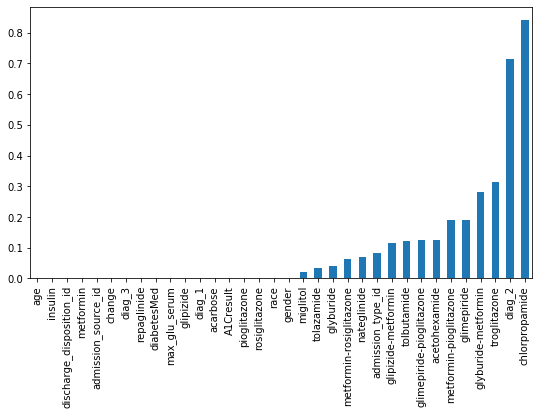

In [51]:
plt.figure(figsize=(9,5))
feature['p_value'].sort_values(ascending=True).plot(kind='bar')

#### Annova test

In [52]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [53]:
Anova_test_F_value=[]
Anova_test_p_value=[]
variable_name_list=[]

In [54]:
for variable in num_col:
    mod = ols('readmitted ~ '+variable,data=df).fit()
    aov_table = sm.stats.anova_lm(mod,typ=2)
    Fvalue=aov_table.loc[variable,'F']
    Pvalue=aov_table.loc[variable,'PR(>F)']
    variable_name_list.append(variable)
    Anova_test_F_value.append(Fvalue)
    Anova_test_p_value.append(Pvalue)
    
Anova_categorical_variable_test = pd.DataFrame({"Variable":variable_name_list,"F Value":Anova_test_F_value,"P Value":Anova_test_p_value})

In [55]:
Anova_categorical_variable_test.sort_values(by='F Value',ascending=False)

,Variable,F Value,P Value
3,number_inpatient,4997.742386,0.000000e+00
7,number_diagnoses,1249.900368,4.006630e-272
6,number_emergency,1082.621659,3.504276e-236
5,number_outpatient,681.066626,1.227288e-149
0,time_in_hospital,261.123563,1.156272e-58
2,num_procedures,211.211147,8.351967e-48
4,num_medications,209.167373,2.326793e-47
1,num_lab_procedures,154.916577,1.550348e-35


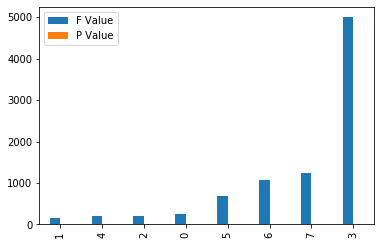

In [56]:
Anova_categorical_variable_test.sort_values(by='P Value',ascending=False).plot(kind='bar')

In [57]:
import statsmodels.stats.proportion as sst
from scipy.stats import chi2_contingency, ttest_ind,shapiro,mannwhitneyu

In [58]:
sst.proportions_ztest([20671,26119],[47271,54117])

(-14.450813260958036, 2.4774324353035253e-47)

since here p_value is 1.35e-26 which is less than 0.05 we are falied to reject H0 where we can say there is proportional diff bt insulin using and not using

In [59]:
table2 = pd.crosstab(drugs['metformin'],drugs['readmitted'])
table2

readmitted,0,1
metformin,,
0,43301,38157
1,314,258
2,10355,7940
3,628,435


In [60]:
sst.proportions_ztest([38157,8633],[81458,19930])

(8.950007418501192, 3.554584674453775e-19)

In [61]:
table3=pd.crosstab(df["race"],df["readmitted"])
chi_2,p_value,dof,exp=chi2_contingency(table3)
print("chi_2-",chi_2,"p_value-",p_value)

chi_2- 78.03615172004146 p_value- 4.538592202558446e-16


In [62]:
table4=pd.crosstab(df["max_glu_serum"],df["readmitted"])
chi_2,p_value,dof,exp=chi2_contingency(table4)
print("chi_2-",chi_2,"p_value-",p_value)

chi_2- 48.83718588338631 p_value- 1.4128289800320484e-10


In [63]:
table5=pd.crosstab(df["A1Cresult"],df["A1Cresult"])
chi_2,p_value,dof,exp=chi2_contingency(table5)
print("chi_2-",chi_2,"p_value-",p_value)

chi_2- 304164.0 p_value- 0.0


In [64]:
table6=pd.crosstab(df["gender"],df["readmitted"])
table6

readmitted,0,1
gender,,
0,28912,25614
1,25686,21176


In [65]:
sst.proportions_ztest([25614,21176],[54526,46862])

(5.693100273534177, 1.2475306970379358e-08)

In [66]:
table7=pd.crosstab(df["diag_1"],df["readmitted"])
chi_2,p_value,dof,exp=chi2_contingency(table7)
print("chi_2-",chi_2,"p_value-",p_value)

chi_2- 701.1678490360963 p_value- 4.9141246686116534e-138


In [67]:
table8=pd.crosstab(df["diag_2"],df["readmitted"])
chi_2,p_value,dof,exp=chi2_contingency(table8)
print("chi_2-",chi_2,"p_value-",p_value)

chi_2- 454.53782194255416 p_value- 6.913996876435883e-86


In [68]:
table9=pd.crosstab(df["diag_3"],df["readmitted"])
chi_2,p_value,dof,exp=chi2_contingency(table9)
print("chi_2-",chi_2,"p_value-",p_value)

chi_2- 388.9737200794194 p_value- 3.731640842760018e-72


In [69]:
table10=pd.crosstab(df["change"],df["readmitted"])
table10

readmitted,0,1
change,,
0,30524,24017
1,24074,22773


In [70]:
sst.proportions_ztest([24017,22773],[53297,46847])

(-11.231402828824862, 2.8590282148742277e-29)

In [71]:
table11=pd.crosstab(df["diabetesMed"],df["readmitted"])
table11

readmitted,0,1
diabetesMed,,
0,13883,9458
1,40715,37332


In [72]:
sst.proportions_ztest([9458,37332],[23338,78047])

(-19.645149165803268, 6.360956562020591e-86)

In [73]:
readmitted_0=df[df["readmitted"]==0]
readmitted_1=df[df["readmitted"]==1]

In [74]:
num_col.columns

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'number_inpatient', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_diagnoses'],
      dtype='object')

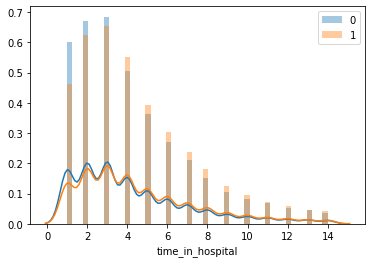

In [75]:
sns.distplot(readmitted_0["time_in_hospital"])
sns.distplot(readmitted_1["time_in_hospital"])
plt.legend([0,1])
plt.show()

In [76]:
ttest_ind(readmitted_0["time_in_hospital"],readmitted_1["time_in_hospital"])

Ttest_indResult(statistic=-16.159318138475864, pvalue=1.1562722637347654e-58)

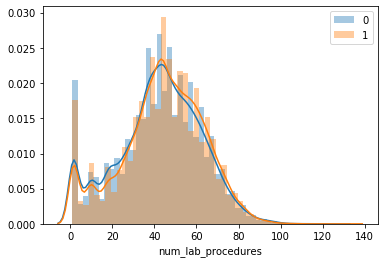

In [77]:
sns.distplot(readmitted_0["num_lab_procedures"])
sns.distplot(readmitted_1["num_lab_procedures"])
plt.legend([0,1])
plt.show()

In [78]:
ttest_ind(readmitted_0["num_lab_procedures"],readmitted_1["num_lab_procedures"])

Ttest_indResult(statistic=-12.446548805752114, pvalue=1.5503479061303804e-35)

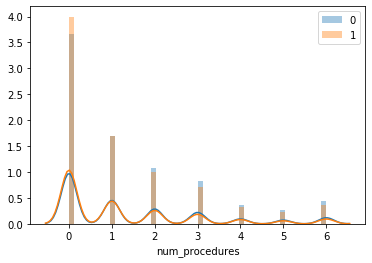

In [79]:
sns.distplot(readmitted_0["num_procedures"])
sns.distplot(readmitted_1["num_procedures"])
plt.legend([0,1])
plt.show()

In [80]:
ttest_ind(readmitted_0["num_procedures"],readmitted_1["num_procedures"])

Ttest_indResult(statistic=14.533105206292145, pvalue=8.35196667238723e-48)

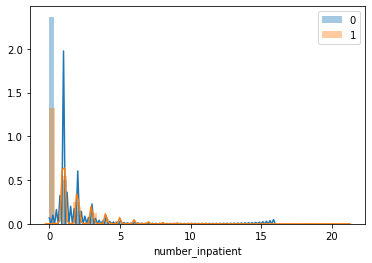

In [81]:
sns.distplot(readmitted_0["number_inpatient"])
sns.distplot(readmitted_1["number_inpatient"])
plt.legend([0,1])
plt.show()

In [82]:
ttest_ind(readmitted_0["number_inpatient"],readmitted_1["number_inpatient"])

Ttest_indResult(statistic=-70.69471257742059, pvalue=0.0)

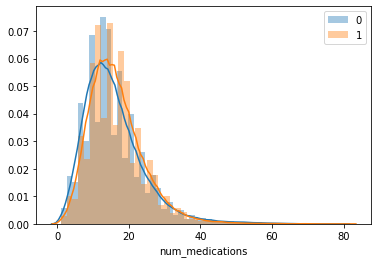

In [83]:
sns.distplot(readmitted_0["num_medications"])
sns.distplot(readmitted_1["num_medications"])
plt.legend([0,1])
plt.show()

In [84]:
ttest_ind(readmitted_0["num_medications"],readmitted_1["num_medications"])

Ttest_indResult(statistic=-14.462619866592195, pvalue=2.326793388491218e-47)

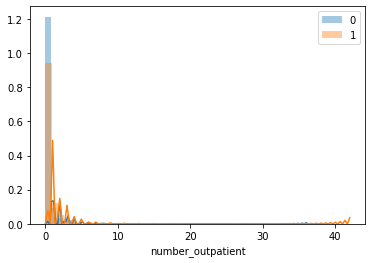

In [85]:
sns.distplot(readmitted_0["number_outpatient"])
sns.distplot(readmitted_1["number_outpatient"])
plt.legend([0,1])
plt.show()

In [86]:
ttest_ind(readmitted_0["number_outpatient"],readmitted_1["number_outpatient"])

Ttest_indResult(statistic=-26.097253227337223, pvalue=1.2272877400438544e-149)

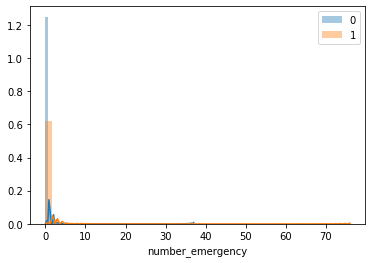

In [87]:
sns.distplot(readmitted_0["number_emergency"])
sns.distplot(readmitted_1["number_emergency"])
plt.legend([0,1])
plt.show()

In [88]:
ttest_ind(readmitted_0["number_emergency"],readmitted_1["number_emergency"])

Ttest_indResult(statistic=-32.903216542740886, pvalue=3.504275646574359e-236)

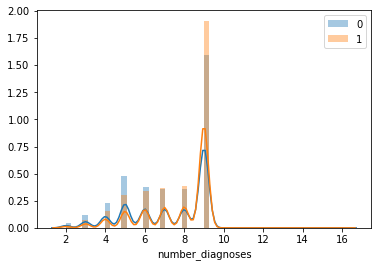

In [89]:
sns.distplot(readmitted_0["number_diagnoses"])
sns.distplot(readmitted_1["number_diagnoses"])
plt.legend([0,1])
plt.show()

In [90]:
ttest_ind(readmitted_0["number_diagnoses"],readmitted_1["number_diagnoses"])

Ttest_indResult(statistic=-35.35393002177477, pvalue=4.006629986728069e-272)

In [91]:
df1= pd.get_dummies(df,columns=['race','age','admission_type_id', 'discharge_disposition_id', 
              'admission_source_id','diag_1', 'diag_2', 'diag_3'],drop_first=True)

In [92]:
df1.head()

,gender,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,race_2,race_3,race_4,race_5,age_10,age_20,age_30,age_40,age_50,age_60,age_70,age_80,age_90,admission_type_id_2,admission_type_id_3,admission_type_id_4,admission_type_id_5,discharge_disposition_id_2,discharge_disposition_id_3,discharge_disposition_id_4,discharge_disposition_id_5,discharge_disposition_id_6,discharge_disposition_id_7,admission_source_id_2,admission_source_id_3,admission_source_id_4,admission_source_id_5,admission_source_id_6,diag_1_2,diag_1_3,diag_1_4,diag_1_5,diag_1_6,diag_1_7,diag_1_8,diag_1_9,diag_1_10,diag_1_11,diag_1_12,diag_1_13,diag_1_14,diag_1_16,diag_1_17,diag_1_18,diag_1_19,diag_2_2,diag_2_3,diag_2_4,diag_2_5,diag_2_6,diag_2_7,diag_2_8,diag_2_9,diag_2_10,diag_2_11,diag_2_12,diag_2_13,diag_2_14,diag_2_16,diag_2_17,diag_2_18,diag_2_19,diag_3_2,diag_3_3,diag_3_4,diag_3_5,diag_3_6,diag_3_7,diag_3_8,diag_3_9,diag_3_10,diag_3_11,diag_3_12,diag_3_13,diag_3_14,diag_3_16,diag_3_17,diag_3_18,diag_3_19
1,0,3,59,0,18,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,2,11,5,13,2,0,1,6,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,2,44,1,16,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1,1,51,0,8,0,0,0,5,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,3,31,6,16,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [93]:
cols=num_col.columns
for i in cols:
    num_col[i]=(num_col[i]-num_col[i].min())/(num_col[i].max()-num_col[i].min())

C:\Users\Kousalya Ganesan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [94]:
num_col.head()

,time_in_hospital,num_lab_procedures,num_procedures,number_inpatient,num_medications,number_outpatient,number_emergency,number_diagnoses
1,0.153846,0.442748,0.000000,0.000000,0.2125,0.000000,0.0,0.500000
2,0.076923,0.076336,0.833333,0.047619,0.1500,0.047619,0.0,0.285714
3,0.076923,0.328244,0.166667,0.000000,0.1875,0.000000,0.0,0.357143
4,0.000000,0.381679,0.000000,0.000000,0.0875,0.000000,0.0,0.214286
5,0.153846,0.229008,1.000000,0.000000,0.1875,0.000000,0.0,0.500000


In [95]:
cat_col_1 = pd.get_dummies(cat_col,columns=['race','age','admission_type_id', 'discharge_disposition_id', 
              'admission_source_id','diag_1', 'diag_2', 'diag_3'],drop_first=True)

In [96]:
d1=pd.concat([num_col,cat_col_1,odinal_col],join="outer",axis=1)
d1

,time_in_hospital,num_lab_procedures,num_procedures,number_inpatient,num_medications,number_outpatient,number_emergency,number_diagnoses,race_2,race_3,race_4,race_5,age_10,age_20,age_30,age_40,age_50,age_60,age_70,age_80,age_90,admission_type_id_2,admission_type_id_3,admission_type_id_4,admission_type_id_5,discharge_disposition_id_2,discharge_disposition_id_3,discharge_disposition_id_4,discharge_disposition_id_5,discharge_disposition_id_6,discharge_disposition_id_7,admission_source_id_2,admission_source_id_3,admission_source_id_4,admission_source_id_5,admission_source_id_6,diag_1_2,diag_1_3,diag_1_4,diag_1_5,diag_1_6,diag_1_7,diag_1_8,diag_1_9,diag_1_10,diag_1_11,diag_1_12,diag_1_13,diag_1_14,diag_1_16,diag_1_17,diag_1_18,diag_1_19,diag_2_2,diag_2_3,diag_2_4,diag_2_5,diag_2_6,diag_2_7,diag_2_8,diag_2_9,diag_2_10,diag_2_11,diag_2_12,diag_2_13,diag_2_14,diag_2_16,diag_2_17,diag_2_18,diag_2_19,diag_3_2,diag_3_3,diag_3_4,diag_3_5,diag_3_6,diag_3_7,diag_3_8,diag_3_9,diag_3_10,diag_3_11,diag_3_12,diag_3_13,diag_3_14,diag_3_16,diag_3_17,diag_3_18,diag_3_19,gender,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,0.153846,0.442748,0.000000,0.000000,0.2125,0.000000,0.0,0.500000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,1,1
2,0.076923,0.076336,0.833333,0.047619,0.1500,0.047619,0.0,0.285714,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0.076923,0.328244,0.166667,0.000000,0.1875,0.000000,0.0,0.357143,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,1,0
4,0.000000,0.381679,0.000000,0.000000,0.0875,0.000000,0.0,0.214286,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,1,0
5,0.153846,0.229008,1.000000,0.000000,0.1875,0.000000,0.0,0.500000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,0.153846,0.381679,0.000000,0.000000,0.1875,0.000000,0.0,0.500000,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1
101762,0.307692,0.244275,0.500000,0.047619,0.2125,0.000000,0.0,0.500000,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0
101763,0.000000,0.396947,0.000000,0.000000,0.1000,0.023810,0.0,0.785714,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [97]:
X = d1.drop('readmitted',axis=1)
y = d1['readmitted']

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [99]:
def model_eval(algo,Xtrain,ytrain,Xtest,ytest):
    algo.fit(Xtrain,ytrain)

    y_train_pred=algo.predict(Xtrain)
    y_train_prob=algo.predict_proba(Xtrain)[:,1]
    
    y_test_pred=algo.predict(Xtest)
    y_test_prob=algo.predict_proba(Xtest)[:,1]
    print(algo)
    print('\n'*1)
    print(' Accuracy score of train: ', accuracy_score(ytrain,y_train_pred))
    print(' Accuracy score of test: ', accuracy_score(ytest,y_test_pred))
    print('\n'*1)
    print(' Confusion Matrix of train: ', confusion_matrix(ytrain,y_train_pred))
    print(' Confusion Matrix of test: ', confusion_matrix(ytest,y_test_pred))
    print('\n'*1)
    print(' Auc of train: ', roc_auc_score(ytrain,y_train_prob))
    print(' Auc of test: ', roc_auc_score(ytest,y_test_prob))
    print('\n'*1)
    print('CP ', classification_report(ytrain,y_train_pred))
    print('CP ', classification_report(y_test,y_test_pred))
    

In [100]:
df['readmitted'].value_counts()

0    54598
1    46790
Name: readmitted, dtype: int64

### Logistic Regression

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [102]:
from sklearn.linear_model import LogisticRegression

In [103]:

lr = LogisticRegression(solver='liblinear')
model_eval(lr,X_train,y_train,X_test,y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


 Accuracy score of train:  0.627974806611151
 Accuracy score of test:  0.630995824703291


 Confusion Matrix of train:  [[29096  8941]
 [17462 15472]]
 Confusion Matrix of test:  [[12623  3938]
 [ 7286  6570]]


 Auc of train:  0.671373532081303
 Auc of test:  0.671150981315071


CP                precision    recall  f1-score   support

           0       0.62      0.76      0.69     38037
           1       0.63      0.47      0.54     32934

    accuracy                           0.63     70971
   macro avg       0.63      0.62      0.61     70971
weighted avg       0.63      0.63      0.62     70971

CP                precision    recall  f1-score   suppor

### Naive Bayes

In [104]:
nb = BernoulliNB()
model_eval(nb,X_train,y_train,X_test,y_test)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)


 Accuracy score of train:  0.6211410294345577
 Accuracy score of test:  0.6211986717953776


 Confusion Matrix of train:  [[26446 11591]
 [15297 17637]]
 Confusion Matrix of test:  [[11382  5179]
 [ 6343  7513]]


 Auc of train:  0.6591257698971194
 Auc of test:  0.6602555721461131


CP                precision    recall  f1-score   support

           0       0.63      0.70      0.66     38037
           1       0.60      0.54      0.57     32934

    accuracy                           0.62     70971
   macro avg       0.62      0.62      0.62     70971
weighted avg       0.62      0.62      0.62     70971

CP                precision    recall  f1-score   support

           0       0.64      0.69      0.66     16561
           1       0.59      0.54      0.57     13856

    accuracy                           0.62     30417
   macro avg       0.62      0.61      0.61     30417
weighted avg       0.62      0.62  

### DecisionTreeClassifier

In [105]:
dtc = DecisionTreeClassifier()
model_eval(dtc,X_train,y_train,X_test,y_test)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


 Accuracy score of train:  1.0
 Accuracy score of test:  0.5557089785317422


 Confusion Matrix of train:  [[38037     0]
 [    0 32934]]
 Confusion Matrix of test:  [[9632 6929]
 [6585 7271]]


 Auc of train:  1.0
 Auc of test:  0.553181004897842


CP                precision    recall  f1-score   support

           0       1.00      1.00      1.00     38037
           1       1.00      1.00      1.00     32934

    accuracy                           1.00     70971
   macro avg       1.00      1.00      1.00     70971
weighted avg       1.00      1.00      1.00     70971

CP          

#### Hypertuning the parmeters

In [106]:
max_depth = [2,3,4,5,6,7,8]
min_samples_split = [2,3,4,5,6,7,8]
min_samples_leaf = [6,7,8,9,10,11,12,13,14,15]
criterion = ['gini','entropy']

params = {'max_depth':max_depth,'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf,'criterion':criterion}

gsearch = GridSearchCV(dtc,param_grid=params,scoring='roc_auc',cv=3,n_jobs=-1)

gsearch.fit(X,y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8],
                  

In [107]:
gsearch.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 9,
 'min_samples_split': 4}

In [108]:
dtc = DecisionTreeClassifier(**gsearch.best_params_)
model_eval(dtc,X_train,y_train,X_test,y_test)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


 Accuracy score of train:  0.6306942272195686
 Accuracy score of test:  0.6315547226879705


 Confusion Matrix of train:  [[28607  9430]
 [16780 16154]]
 Confusion Matrix of test:  [[12381  4180]
 [ 7027  6829]]


 Auc of train:  0.6637466956672684
 Auc of test:  0.6613806751316045


CP                precision    recall  f1-score   support

           0       0.63      0.75      0.69     38037
           1       0.63      0.49      0.55     32934

    accuracy                           0.63     70971
   macro avg       0.63      0.62      0.62     70971
weighted avg       0.63      0.63  

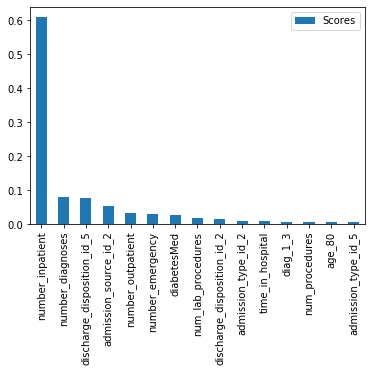

In [109]:
pd.DataFrame(index=X.columns,data=dtc.feature_importances_,columns=["Scores"]).sort_values("Scores",ascending=False).head(15).plot.bar()

#### RandomForestClassifier

In [110]:
rfc = RandomForestClassifier()
model_eval(rfc,X_train,y_train,X_test,y_test)

C:\Users\Kousalya Ganesan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


 Accuracy score of train:  0.9839371010694509
 Accuracy score of test:  0.6009797152907913


 Confusion Matrix of train:  [[37911   126]
 [ 1014 31920]]
 Confusion Matrix of test:  [[12227  4334]
 [ 7803  6053]]


 Auc of train:  0.9990683889486306
 Auc of test:  0.6295632809413529


CP                precision    recall  f1-score   support

           0       0.97      1.00      0.99     38037
           1       1.00      0.97      0.98     32934

    accuracy                           0.98     70971
 

In [111]:
params = {
    'n_estimators' : sp_randint(5,150),
    'max_depth': sp_randint(2,10),
    'max_features' : sp_randint(1,15),
    'min_samples_split' : sp_randint(2,50),
    'min_samples_leaf' : sp_randint(1,50),
    'criterion' : ['gini','entropy']}

rsearch_rf = RandomizedSearchCV(rfc,param_distributions=params,n_iter=100,n_jobs=-1,cv=3,scoring='roc_auc',random_state=1)
rsearch_rf.fit(X,y)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=10,
                                                    n_jobs=None,
  

In [112]:
rsearch_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 12,
 'min_samples_leaf': 13,
 'min_samples_split': 14,
 'n_estimators': 125}

In [113]:
rfc = RandomForestClassifier(**rsearch_rf.best_params_)
model_eval(rfc,X_train,y_train,X_test,y_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=12, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=13, min_samples_split=14,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


 Accuracy score of train:  0.6392892871736343
 Accuracy score of test:  0.6364861754939672


 Confusion Matrix of train:  [[29986  8051]
 [17549 15385]]
 Confusion Matrix of test:  [[12903  3658]
 [ 7399  6457]]


 Auc of train:  0.688960242242965
 Auc of test:  0.6817051159489733


CP                precision    recall  f1-score   support

           0       0.63      0.79      0.70     38037
           1       0.66      0.47      0.55     32934

    accuracy                           0.64     70971
   

#### STACKING

In [119]:
from sklearn.ensemble import VotingClassifier

In [120]:
clf = VotingClassifier(estimators=[('NB',nb),('rfc',rfc),('dtc',dtc)],voting='soft',weights=[1,3,2])
model_eval(clf,X_train,y_train,X_test,y_test)

VotingClassifier(estimators=[('NB',
                              BernoulliNB(alpha=1.0, binarize=0.0,
                                          class_prior=None, fit_prior=True)),
                             ('rfc',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='entropy',
                                                     max_depth=8,
                                                     max_features=12,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=13,
                                                     min_samples_split=14,
                                                  

### Ada Boost

In [121]:
ada = AdaBoostClassifier(random_state=1)
model_eval(ada,X_train,y_train,X_test,y_test)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=1)


 Accuracy score of train:  0.6307224077440081
 Accuracy score of test:  0.6326396423052898


 Confusion Matrix of train:  [[28962  9075]
 [17133 15801]]
 Confusion Matrix of test:  [[12530  4031]
 [ 7143  6713]]


 Auc of train:  0.673169166344649
 Auc of test:  0.6748524102683995


CP                precision    recall  f1-score   support

           0       0.63      0.76      0.69     38037
           1       0.64      0.48      0.55     32934

    accuracy                           0.63     70971
   macro avg       0.63      0.62      0.62     70971
weighted avg       0.63      0.63      0.62     70971

CP                precision    recall  f1-score   support

           0       0.64      0.76      0.69     16561
           1       0.62      0.48      0.55     13856

    accuracy                           0.63     30417
   macro avg       0.63      

### Light GBM

In [122]:
lgbc  = lgb.LGBMClassifier()
model_eval(lgbc,X_train,y_train,X_test,y_test)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


 Accuracy score of train:  0.6611855546631723
 Accuracy score of test:  0.6424696715652432


 Confusion Matrix of train:  [[28886  9151]
 [14895 18039]]
 Confusion Matrix of test:  [[12226  4335]
 [ 6540  7316]]


 Auc of train:  0.7255209946111112
 Auc of test:  0.6928339899849573


CP                precision    recall  f1-score   support

           0       0.66      0.76      0.71     38037
           1       0.66      0.55      0.60     32934

    accuracy                           0.66     70971
   macro avg       0.66      0.6

In [123]:
params = {
    'n_estimators' : sp_randint(50,200),
    'num_leaves': sp_randint(10,50),
    'max_depth' : sp_randint(2,15),
    'learning_rate': sp_uniform(0,1),
    'min_child_samples' : sp_randint(2,50)}

rsearch_lgbm = RandomizedSearchCV(lgbc,param_distributions=params,cv=3,random_state=1,n_jobs=-1,n_iter=200,scoring='roc_auc')

rsearch_lgbm.fit(X,y)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, objective=None,
                                            random_state=None, reg_alpha=0.0,
                                            reg...
                                        'min_child_samples': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000286

In [124]:
rsearch_lgbm.best_params_

{'learning_rate': 0.04971101640961195,
 'max_depth': 5,
 'min_child_samples': 44,
 'n_estimators': 85,
 'num_leaves': 27}

In [125]:
lgbc  = lgb.LGBMClassifier(**rsearch_lgbm.best_params_)
model_eval(lgbc,X_train,y_train,X_test,y_test)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.04971101640961195,
               max_depth=5, min_child_samples=44, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=85, n_jobs=-1, num_leaves=27,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)


 Accuracy score of train:  0.641036479688887
 Accuracy score of test:  0.6370121971266068


 Confusion Matrix of train:  [[29323  8714]
 [16762 16172]]
 Confusion Matrix of test:  [[12592  3969]
 [ 7072  6784]]


 Auc of train:  0.6938259659818402
 Auc of test:  0.686019677253789


CP                precision    recall  f1-score   support

           0       0.64      0.77      0.70     38037
           1       0.65      0.49      0.56     32934

    accuracy                           0.64     70971
   ma

### Regularization:

#### Backward elimination

In [126]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [127]:
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)


C:\Users\Kousalya Ganesan\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


['time_in_hospital', 'num_procedures', 'number_inpatient', 'number_outpatient', 'number_emergency', 'number_diagnoses', 'race_3', 'race_4', 'race_5', 'age_10', 'age_20', 'age_30', 'age_40', 'age_50', 'age_60', 'age_70', 'age_80', 'admission_type_id_4', 'admission_type_id_5', 'discharge_disposition_id_2', 'discharge_disposition_id_5', 'admission_source_id_2', 'admission_source_id_3', 'admission_source_id_5', 'admission_source_id_6', 'diag_1_2', 'diag_1_3', 'diag_1_4', 'diag_1_5', 'diag_1_7', 'diag_1_8', 'diag_1_9', 'diag_1_12', 'diag_1_16', 'diag_1_17', 'diag_1_18', 'diag_2_5', 'diag_2_6', 'diag_2_7', 'diag_2_11', 'diag_2_12', 'diag_2_14', 'diag_2_16', 'diag_2_17', 'diag_2_18', 'diag_3_2', 'diag_3_9', 'diag_3_10', 'diag_3_12', 'diag_3_17', 'gender', 'A1Cresult', 'metformin', 'repaglinide', 'rosiglitazone', 'acarbose', 'insulin', 'change', 'diabetesMed']


In [130]:
X1=d1[['time_in_hospital', 'num_procedures', 'number_inpatient', 'number_outpatient', 'number_emergency', 'number_diagnoses', 'race_3', 'race_4', 'race_5', 'age_10', 'age_20', 'age_30', 'age_40', 'age_50', 'age_60', 'age_70', 'age_80', 'admission_type_id_4', 'admission_type_id_5', 'discharge_disposition_id_2', 'discharge_disposition_id_5', 'admission_source_id_2', 'admission_source_id_3', 'admission_source_id_5', 'admission_source_id_6', 'diag_1_2', 'diag_1_3', 'diag_1_4', 'diag_1_5', 'diag_1_7', 'diag_1_8', 'diag_1_9', 'diag_1_12', 'diag_1_16', 'diag_1_17', 'diag_1_18', 'diag_2_5', 'diag_2_6', 'diag_2_7', 'diag_2_11', 'diag_2_12', 'diag_2_14', 'diag_2_16', 'diag_2_17', 'diag_2_18', 'diag_3_2', 'diag_3_9', 'diag_3_10', 'diag_3_12', 'diag_3_17', 'gender', 'A1Cresult', 'metformin', 'repaglinide', 'rosiglitazone', 'acarbose', 'insulin', 'change', 'diabetesMed']]
y1=d1['readmitted']



#### Logistic Regression

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.30, random_state=1)
lr = LogisticRegression(solver='liblinear')
model_eval(lr,X_train,y_train,X_test,y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


 Accuracy score of train:  0.6277775429400742
 Accuracy score of test:  0.6304698030706513


 Confusion Matrix of train:  [[29145  8892]
 [17525 15409]]
 Confusion Matrix of test:  [[12601  3960]
 [ 7280  6576]]


 Auc of train:  0.6709196758442264
 Auc of test:  0.6715295854760753


CP                precision    recall  f1-score   support

           0       0.62      0.77      0.69     38037
           1       0.63      0.47      0.54     32934

    accuracy                           0.63     70971
   macro avg       0.63      0.62      0.61     70971
weighted avg       0.63      0.63      0.62     70971

CP                precision    recall  f1-score   su

#### Light GBM Model

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.30, random_state=1)
lgbc  = lgb.LGBMClassifier(**rsearch_lgbm.best_params_)
model_eval(lgbc,X_train,y_train,X_test,y_test)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.04971101640961195,
               max_depth=5, min_child_samples=44, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=85, n_jobs=-1, num_leaves=27,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)


 Accuracy score of train:  0.6374293725606234
 Accuracy score of test:  0.635269750468488


 Confusion Matrix of train:  [[29242  8795]
 [16937 15997]]
 Confusion Matrix of test:  [[12621  3940]
 [ 7154  6702]]


 Auc of train:  0.6896901430920964
 Auc of test:  0.6830408702838815


CP                precision    recall  f1-score   support

           0       0.63      0.77      0.69     38037
           1       0.65      0.49      0.55     32934

    accuracy                           0.64     70971
   m